In [1]:
f=open('./paradiso.txt')
texts=f.readlines()
f.close()
texts[140:160]
#texts[170]

['no longer hindered, you remained below,\n',
 'as if, on earth, a living flame stood still.”\n',
 'Then she again turned her gaze heavenward.\n',
 'CANTO II\n',
 'O you who are within your little bark, \n',
 'eager to listen, following behind\n',
 'my ship that, singing, crosses to deep seas,\n',
 'turn back to see your shores again: do not\n',
 'attempt to sail the seas I sail: you may,\n',
 'by losing sight of me, be left astray.\n',
 'The waves I take were never sailed before;\n',
 'Minerva breathes, Apollo pilots me, \n',
 'and the nine Muses show to me the Bears. \n',
 'You other few who turned your minds in time\n',
 'unto the bread of angels, which provides \n',
 'men here with life but hungering for more \n',
 'you may indeed commit your vessel to\n',
 'the deep salt-sea, keeping your course within\n',
 'my wake, ahead of where waves smooth again.\n',
 'Those men of glory, those who crossed to Colchis, \n']

In [2]:
import nltk
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

In [3]:
# 删除数字/标点符号，分词
import string
from nltk import word_tokenize

remove_chars = string.digits+string.punctuation +'\n' + '“' + '’'+'”'
remove_map = str.maketrans(remove_chars, " " * len(remove_chars))

sentences_list = [word_tokenize(t.translate(remove_map).lower()) for t in texts]
print(remove_chars)
sentences_list[110:120]

0123456789!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
“’”


[['its', 'bent', 'according', 'to', 'a', 'different', 'station'],
 ['nearer', 'or', 'less', 'near', 'to', 'its', 'origin'],
 ['therefore', 'these', 'natures', 'move', 'to', 'different', 'ports'],
 ['across', 'the', 'mighty', 'sea', 'of', 'being', 'each'],
 ['given', 'the', 'impulse', 'that', 'will', 'bear', 'it', 'on'],
 ['this', 'impulse', 'carries', 'fire', 'to', 'the', 'moon'],
 ['this', 'is', 'the', 'motive', 'force', 'in', 'mortal', 'creatures'],
 ['this', 'binds', 'the', 'earth', 'together', 'makes', 'it', 'one'],
 ['not', 'only', 'does', 'the', 'shaft', 'shot', 'from', 'this', 'bow'],
 ['strike', 'creatures', 'lacking', 'intellect', 'but', 'those']]

In [4]:
search_word = 'make'
for i,s in enumerate(sentences_list):
    if search_word in s:
        print(i,s)
        break
count = 0
for s in sentences_list:
    count += s.count(search_word)
print(count)
#print(sentences_list[115])

14 ['make', 'me', 'the', 'vessel', 'of', 'your', 'excellence']
20


In [5]:
# delete the stopwords
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
stopWords |= {'one','upon'}
#stopWords -|= {'one'}
print(stopWords)

sentences_without_sw = [[w for w in s if w not in stopWords] for s in sentences_list]
sentences_without_sw[110:120]

{'down', 'if', 'to', 'from', 'their', 'too', "she's", 'wouldn', 'mightn', "mustn't", 'ours', 'through', 'these', 'do', 'above', 'each', 'hers', "that'll", 'being', 'again', 'yourself', 'one', 'all', 's', 'll', 'out', 'so', 'our', 'isn', 'himself', 'into', 'once', 'nor', 'should', "you've", 'not', "it's", 'can', "you'll", "weren't", 'hasn', 'for', "haven't", 'shan', 'is', 'no', 'am', 'then', 'them', 'with', 'own', 'here', 'upon', 't', 'only', 'the', 'because', 'itself', 'doesn', 'mustn', 'an', "shouldn't", 'those', 'why', "hadn't", 'how', 'couldn', 'ma', 'me', 'where', "won't", 'than', 'at', 'most', 'but', 'against', 'further', 'aren', 'just', 'they', 'some', 'it', "you'd", 'during', 'both', 'didn', 'weren', "should've", 'haven', 'does', 'by', 'been', "don't", 'her', 'be', 'while', 'on', 'about', 'will', 'had', "aren't", "hasn't", 'myself', 'm', 'when', 'ourselves', "shan't", 'y', 'o', 'ain', 'won', "isn't", 'shouldn', 'under', 'don', 'its', 'such', 'as', 'below', "doesn't", "you're", '

[['bent', 'according', 'different', 'station'],
 ['nearer', 'less', 'near', 'origin'],
 ['therefore', 'natures', 'move', 'different', 'ports'],
 ['across', 'mighty', 'sea'],
 ['given', 'impulse', 'bear'],
 ['impulse', 'carries', 'fire', 'moon'],
 ['motive', 'force', 'mortal', 'creatures'],
 ['binds', 'earth', 'together', 'makes'],
 ['shaft', 'shot', 'bow'],
 ['strike', 'creatures', 'lacking', 'intellect']]

In [6]:
search_word = '”'
for i,s in enumerate(sentences_without_sw):
    if search_word in s:
        print(i,s)
        break
count = 0
for s in sentences_without_sw:
    count += s.count(search_word)
print(count)

0


In [7]:
# 标注词形
from nltk import pos_tag

tagged_sentences = [pos_tag(s) for s in sentences_without_sw]
tagged_sentences[110:120]

[[('bent', 'NN'),
  ('according', 'VBG'),
  ('different', 'JJ'),
  ('station', 'NN')],
 [('nearer', 'RB'), ('less', 'RBR'), ('near', 'IN'), ('origin', 'NN')],
 [('therefore', 'RB'),
  ('natures', 'NNS'),
  ('move', 'VBP'),
  ('different', 'JJ'),
  ('ports', 'NNS')],
 [('across', 'IN'), ('mighty', 'NNS'), ('sea', 'NN')],
 [('given', 'VBN'), ('impulse', 'JJ'), ('bear', 'NN')],
 [('impulse', 'JJ'), ('carries', 'VBZ'), ('fire', 'NN'), ('moon', 'NN')],
 [('motive', 'JJ'), ('force', 'NN'), ('mortal', 'NN'), ('creatures', 'NNS')],
 [('binds', 'NNS'), ('earth', 'VBP'), ('together', 'RB'), ('makes', 'VBZ')],
 [('shaft', 'NN'), ('shot', 'NN'), ('bow', 'NN')],
 [('strike', 'NN'),
  ('creatures', 'NNS'),
  ('lacking', 'VBG'),
  ('intellect', 'NN')]]

In [8]:
# 词形还原
from nltk.corpus import wordnet
from nltk import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
tag_dict = {"J": wordnet.ADJ,
            "N": wordnet.NOUN,
            "V": wordnet.VERB,
            "R": wordnet.ADV}
lemmatized_sentences = [[
        lemmatizer.lemmatize(w[0],tag_dict[w[1][0]]) if tag_dict.get(w[1][0], None) else w[0] for w in s 
    ] for s in tagged_sentences]
lemmatized_sentences[110:120]

[['bent', 'accord', 'different', 'station'],
 ['nearer', 'less', 'near', 'origin'],
 ['therefore', 'nature', 'move', 'different', 'port'],
 ['across', 'mighty', 'sea'],
 ['give', 'impulse', 'bear'],
 ['impulse', 'carry', 'fire', 'moon'],
 ['motive', 'force', 'mortal', 'creature'],
 ['bind', 'earth', 'together', 'make'],
 ['shaft', 'shot', 'bow'],
 ['strike', 'creature', 'lack', 'intellect']]

In [9]:
search_word = '”'
for i,s in enumerate(lemmatized_sentences):
    if search_word in s:
        print(i,s)
        break
count = 0
for s in lemmatized_sentences:
    count += s.count(search_word)
print(count)

0


In [10]:
# 提取词干 暂时不做
from nltk import PorterStemmer
stemmer = PorterStemmer()
print(lemmatizer.lemmatize('women','n'))
print(stemmer.stem('women'))
print(lemmatizer.lemmatize('men','n'))

woman
women
men


In [23]:
# 词袋
# from gensim import corpora
# Dictionary = corpora.Dictionary(lemmatized_sentences)
# sentence_bows = [Dictionary.doc2bow(s) for s in lemmatized_sentences]
# sentence_bows[110:120]

In [11]:
# inferno_cleaned = ""
# n_words = 0
# for s in lemmatized_sentences:
#     inferno_cleaned += ' '.join(s)+' '
#     n_words += len(s)
    
# books = [s.split(' ') for s in theAeneid_cleaned.split('book')[1:]]
# theAeneid_cleaned = theAeneid_cleaned.split(' ')

# print(n_words, len(theAeneid_cleaned))
# len(books)

# inferno = ""
# n_words = 0
# for s in lemmatized_sentences:
#     inferno += ' '.join(s)+' '
#     n_words += len(s)
# print(n_words, len(inferno))

paradiso = []
n_words = 0
for s in lemmatized_sentences:
    paradiso += s
    n_words += len(s)
print(n_words, len(paradiso))
search_word = 'go'
print(paradiso.count(search_word))

17061 17061
25


In [12]:
search_word = '”'
print(paradiso.count(search_word))
# inferno[2000:2200]

0


In [14]:
# 统计词频
from nltk.probability import FreqDist
fd = FreqDist(paradiso)
print(fd.most_common(21))

[('see', 224), ('light', 180), ('love', 134), ('would', 132), ('eye', 120), ('within', 110), ('make', 105), ('saw', 96), ('heaven', 94), ('say', 90), ('god', 85), ('first', 79), ('mind', 72), ('may', 72), ('turn', 71), ('like', 71), ('know', 71), ('even', 71), ('great', 70), ('high', 68), ('thing', 67)]


In [27]:
# 分章节词频统计
# for i,b in enumerate(books):
#     fdist = FreqDist(b)
#     tops=fdist.most_common(10)
#     print(f"BOOK {i+1}:{tops}")

BOOK 1:[('”', 199), ('“', 196), ('’', 137), ('say', 84), ('make', 62), ('us', 53), ('see', 52), ('come', 45), ('upon', 44), ('turn', 36)]
BOOK 2:[('’', 232), ('”', 204), ('“', 202), ('see', 101), ('say', 85), ('make', 63), ('us', 50), ('upon', 48), ('saw', 48), ('take', 43)]


Text(0.5, 1.0, 'Top 20 Most Frequent Words in the Paradiso')

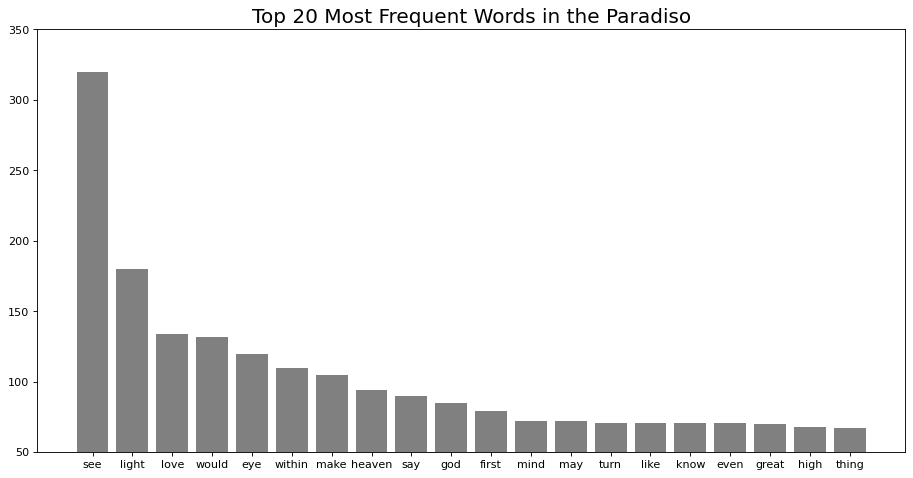

In [17]:
import numpy as np
import matplotlib.pyplot as plt

datas = np.array([('see', 320), ('light', 180), ('love', 134), ('would', 132), ('eye', 120), ('within', 110), 
                  ('make', 105),  ('heaven', 94), ('say', 90), ('god', 85), ('first', 79), ('mind', 72), 
                  ('may', 72), ('turn', 71), ('like', 71), ('know', 71), ('even', 71), ('great', 70), ('high', 68),
                  ('thing', 67)])
x, y = datas[:,0], datas[:,1].astype(np.int64)

fig, ax = plt.subplots(figsize=(14, 7),dpi=80)
plt.ylim(50,350)
ax.bar(x=x, height=y, width=0.8,  # 柱子宽度，默认0.8，两根柱子中心的距离默认为1.0
    align="center",  # 柱子的对齐方式，'center' or 'edge'
    color="grey",  # 柱子颜色
   # edgecolor="red",  # 柱子边框的颜色
    linewidth=2.0  )
ax.set_title("Top 20 Most Frequent Words in the Paradiso", fontsize=18)

Text(0.5, 1.0, 'Top 10 Most Frequent Words in Book IV')

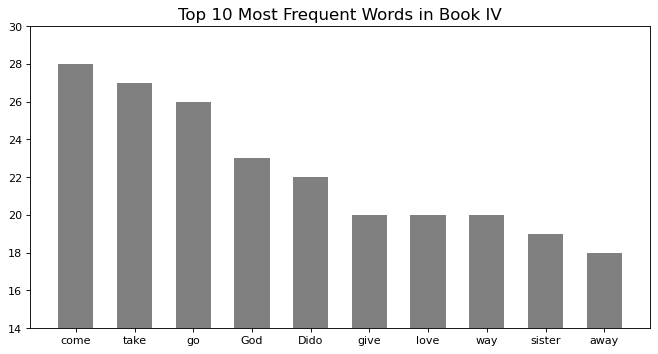

In [75]:
import numpy as np
import matplotlib.pyplot as plt

datas = np.array([('come', 28), ('take', 27), ('go', 26), ('God', 23), ('Dido', 22), 
                  ('give', 20), ('love', 20), ('way', 20), ('sister', 19), ('away', 18)])
x, y = datas[:,0], datas[:,1].astype(np.int64)

fig, ax = plt.subplots(figsize=(10, 5),dpi=80)
plt.ylim(14,30)
ax.bar(x=x, height=y, width=0.6,  # 柱子宽度，默认0.8，两根柱子中心的距离默认为1.0
    align="center",  # 柱子的对齐方式，'center' or 'edge'
    color="grey",  # 柱子颜色
   # edgecolor="red",  # 柱子边框的颜色
    linewidth=2.0  )
ax.set_title("Top 10 Most Frequent Words in Book IV", fontsize=15)

Text(0.5, 1.0, 'Top 10 Most Frequent Words in Book XII')

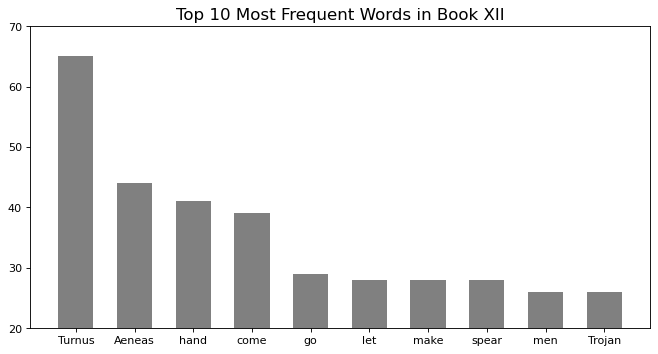

In [77]:
import numpy as np
import matplotlib.pyplot as plt

datas = np.array([('Turnus', 65), ('Aeneas', 44), ('hand', 41), ('come', 39), ('go', 29), 
                  ('let', 28), ('make', 28), ('spear', 28), ('men', 26), ('Trojan', 26)])
x, y = datas[:,0], datas[:,1].astype(np.int64)

fig, ax = plt.subplots(figsize=(10, 5),dpi=80)
plt.ylim(20,70)
ax.bar(x=x, height=y, width=0.6,  # 柱子宽度，默认0.8，两根柱子中心的距离默认为1.0
    align="center",  # 柱子的对齐方式，'center' or 'edge'
    color="grey",  # 柱子颜色
   # edgecolor="red",  # 柱子边框的颜色
    linewidth=2.0  )
ax.set_title("Top 10 Most Frequent Words in Book XII", fontsize=15)

Text(0.5, 1.0, 'Top 20 Most Frequent Words in the Aeneid')

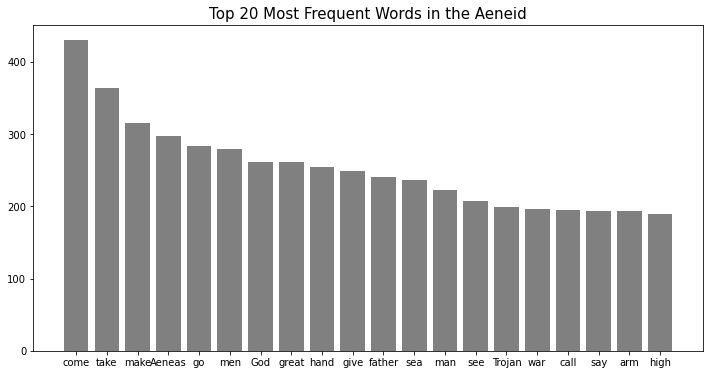

In [22]:
import numpy as np
import matplotlib.pyplot as plt
x = ["come", "take", "make", "Aeneas", "go", "men", "God", "great","hand", "give", "father", "sea", "man", "see", "Trojan", "war","call","say","arm","high"]
y = [430, 364, 316, 297, 283, 280, 262, 262, 255, 249, 241, 237, 222, 207, 199, 196, 195, 194, 193,189]

# 柱状图和散点图不同，散点图的(x,y)均为数值变量
# 柱状图的x轴显示分类变量，有两种处理方式
# 方式1：自己创建x轴坐标，并提供对应的标签
# 方式2：让Matplotlib自动完成映射

# 方式1
# xticks = np.arange(len(x))  # 每根柱子的x轴坐标
# xlabels = x  # 每根柱子的标签
# fig, ax = plt.subplots(figsize=(10, 7))
# ax.bar(x=xticks, height=y, tick_label=xlabels)

# 方式2（推荐）
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x=x, height=y, width=0.8,  # 柱子宽度，默认0.8，两根柱子中心的距离默认为1.0
    align="center",  # 柱子的对齐方式，'center' or 'edge'
    color="grey",  # 柱子颜色
   # edgecolor="red",  # 柱子边框的颜色
    linewidth=2.0  )
ax.set_title("Top 20 Most Frequent Words in the Aeneid", fontsize=15)

Text(0.5, 1.0, 'Top 10 Most Frequent Words in Book XII')

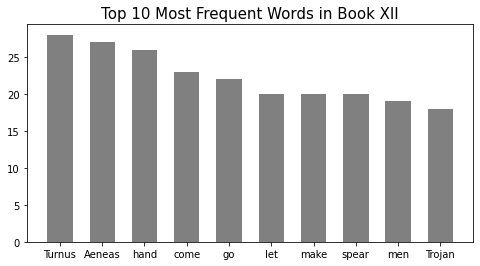

In [18]:
import numpy as np
import matplotlib.pyplot as plt
x = ["Turnus", "Aeneas", "hand", "come", "go", "let", "make", "spear", "men", "Trojan"]
y = [28, 27, 26, 23, 22, 20, 20, 20, 19, 18]

# 柱状图和散点图不同，散点图的(x,y)均为数值变量
# 柱状图的x轴显示分类变量，有两种处理方式
# 方式1：自己创建x轴坐标，并提供对应的标签
# 方式2：让Matplotlib自动完成映射

# 方式1
# xticks = np.arange(len(x))  # 每根柱子的x轴坐标
# xlabels = x  # 每根柱子的标签
# fig, ax = plt.subplots(figsize=(8, 7))
# ax.bar(x=xticks, height=y, tick_label=xlabels)

# 方式2（推荐）
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(x=x, height=y, width=0.6,  # 柱子宽度，默认0.8，两根柱子中心的距离默认为1.0
    align="center",  # 柱子的对齐方式，'center' or 'edge'
    color="grey",  # 柱子颜色
    #edgecolor="red",  # 柱子边框的颜色
    linewidth=2.0  )
